<a href="https://colab.research.google.com/github/iamasifiqbal/ML_Projects/blob/main/Lawyer_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

## Pre-Processing

In [ ]:
lawyer_df = pd.read_csv("/content/LawyerDetail2.csv")
lawyer_df.head()

,Law Firms,Address,Email address,Fields,District,Legal Aids provides?,Pro-Bono Service offers?,Office Hours
0,Amir & Amir Law Associates,Karwan Bazar,info@aalabd.com,Commercial Law,Dhaka,yes,yes,09:00 AM- 8:00 PM
1,Amir & Amir Law Associates,Karwan Bazar,info@aalabd.com,Corporate Governance,Dhaka,yes,yes,09:00 AM- 8:00 PM
2,Amir & Amir Law Associates,Karwan Bazar,info@aalabd.com,Corporate Finance,Dhaka,yes,yes,09:00 AM- 8:00 PM
3,Amir & Amir Law Associates,Karwan Bazar,info@aalabd.com,Banking & Finance,Dhaka,yes,yes,09:00 AM- 8:00 PM
4,Amir & Amir Law Associates,Karwan Bazar,info@aalabd.com,International Trade,Dhaka,yes,yes,09:00 AM- 8:00 PM


In [ ]:
lawyer_df['Legal Aids provides?'] = lawyer_df['Legal Aids provides?'].replace({'yes': 'Yes'})
lawyer_df['Pro-Bono Service offers?'] = lawyer_df['Pro-Bono Service offers?'].replace({'yes': 'Yes'})

In [ ]:
for i in range(len(lawyer_df)):
  lawyer_df.loc[i,'Fields'] = " ".join(lawyer_df.loc[i,'Fields'].split())
  lawyer_df.loc[i,'Law Firms'] = " ".join(lawyer_df.loc[i,'Law Firms'].split())
  lawyer_df.loc[i,'Address'] = " ".join(lawyer_df.loc[i,'Address'].split())

In [ ]:
ml_df = lawyer_df.copy()

In [ ]:
# ml_df = pd.get_dummies(ml_df, columns= ['Address','Fields','District','Legal Aids provides?', 'Pro-Bono Service offers?'], prefix=None)

In [ ]:
ml_df['Fields'] = ml_df['Fields'].str.strip()

In [ ]:
temp = ml_df['Address'].str.strip().unique()
address = {}
for i in range(len(temp)):
  address[temp[i]] = i
temp = ml_df['Fields'].str.strip().unique()

fields = {}
for i in range(len(temp)):
  fields[temp[i]] = i

temp = ml_df['District'].str.strip().unique()
district = {}
for i in range(len(temp)):
  district[temp[i]] = i

categorical_dict = {'Yes':1, 'No':0}

In [ ]:
ml_df['Address'] = ml_df['Address'].replace(address)
ml_df['Fields'] = ml_df['Fields'].replace(fields)
ml_df['District'] = ml_df['District'].replace(district)
ml_df['Legal Aids provides?'] = ml_df['Legal Aids provides?'].replace({'Yes':1, 'No' :0})
ml_df['Pro-Bono Service offers?'] = ml_df['Pro-Bono Service offers?'].replace({'Yes':1, 'No' :0})

In [ ]:
ml_df = ml_df.drop(['Law Firms','Email address','Office Hours'], axis=1)
ml_df.head()

,Address,Fields,District,Legal Aids provides?,Pro-Bono Service offers?
0,0,0,0,1,1
1,0,1,0,1,1
2,0,2,0,1,1
3,0,3,0,1,1
4,0,4,0,1,1


## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(ml_df)
pca_result = pca.transform(ml_df)

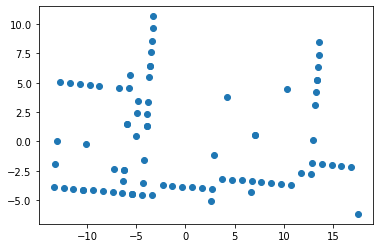

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(pca_result[:,0], pca_result[:,1])
plt.show()

### K-means

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=15, random_state=0).fit(ml_df)

In [ ]:
label = kmeans.labels_

In [ ]:
lawyer_df['label'] = label

### Search for new result

In [ ]:
search_query = ['Agrabad','Civil   Law', 'Chittagong','Yes','No']
Address = 'Agrabad'
Fields = 'Civil Law'
str_District = 'Chittagong'
Legal_Aids_provides = 'Yes'
Pro_Bono_Service_offers= 'No'

In [ ]:
Address = address[Address]
Fields = fields[Fields]
District = district[str_District]
Legal_Aids_provides = categorical_dict[Legal_Aids_provides]
Pro_Bono_Service_offers = categorical_dict[Pro_Bono_Service_offers]

In [ ]:
predict_label = kmeans.predict([[Address,Fields, District, Legal_Aids_provides, Pro_Bono_Service_offers]])[0]

In [ ]:
temp_df = lawyer_df.loc[lawyer_df['label'] == predict_label, :]

In [ ]:
temp_df.columns

Index(['Law Firms', 'Address', 'Email address', 'Fields', 'District',
       'Legal Aids provides?', 'Pro-Bono Service offers?', 'Office Hours',
       'label'],
      dtype='object')

In [ ]:
temp_df = temp_df.drop(temp_df[temp_df['District'] != str_District].index, axis=0)

In [ ]:
temp_df

,Law Firms,Address,Email address,Fields,District,Legal Aids provides?,Pro-Bono Service offers?,Office Hours,label
70,Mahbubul Alam & Associates,Agrabad,mahbubadv.@yahoo.com,Tax Law,Chittagong,Yes,Yes,9.00 AM - 10.00 PM,3
72,Mahbubul Alam & Associates,Agrabad,mahbubadv.@yahoo.com,Civil Law,Chittagong,Yes,Yes,9.00 AM - 10.00 PM,3


In [1]:
!git remote add origin https://<iamasifiqbal>:<kumudinI1>@github.com/<iamasifiqbal>/ML_Projects.git


/bin/bash: iamasifiqbal: No such file or directory


In [2]:
!git remote add origin https://<iamasifiqbal>:<406e8458497374534e234f6b1e3b62f28999b504>@github.com/<iamasifiqbal>/ML_Projects.git


/bin/bash: iamasifiqbal: No such file or directory


In [7]:
import clone
git clone https://github.com/iamasifiqbal/ML_Projects
cd ML_Projects

SyntaxError: ignored

In [9]:
!git remote add origin https://github.com/iamasifiqbal/ML_Projects.git
!git branch -M main
!git push -u origin main

fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
